In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# defining path
path =r'C:\Users\dog\Desktop\Boat sales'

In [4]:
# importing cleaned data
df = pd.read_csv(os.path.join(path, '02 Prepared Data', '27.01.df_boats_cleaned6.2..csv'))

In [5]:
# checking for missing data

In [6]:
df.isnull().sum()

Unnamed: 0              0
boat_type               0
manufacturer            0
type                    0
year_built              0
length                  0
width                   0
material                0
views_last_7_days       0
currency                0
value                   0
value_in_eur            0
country                 0
type_ad                 0
type_ad_DROP         2121
boat_type_clean         0
Boat_Type_DROP       8911
boat_condition          0
price_range             0
dtype: int64

In [7]:
# dropping missing values
df.drop(labels=['Unnamed: 0', 'type_ad_DROP','Boat_Type_DROP'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

boat_type            0
manufacturer         0
type                 0
year_built           0
length               0
width                0
material             0
views_last_7_days    0
currency             0
value                0
value_in_eur         0
country              0
type_ad              0
boat_type_clean      0
boat_condition       0
price_range          0
dtype: int64

In [9]:
df.describe()

,year_built,length,width,views_last_7_days,value,value_in_eur
count,9192.000000,9192.000000,9192.000000,9192.000000,9.192000e+03,9.192000e+03
mean,2004.941036,11.738778,3.595622,147.749130,3.206748e+05,3.017992e+05
std,16.400792,6.000763,1.309842,149.196469,9.752226e+05,9.331982e+05
min,1885.000000,1.040000,0.010000,13.000000,3.300000e+03,3.300000e+03
25%,1999.000000,7.600000,2.550000,70.000000,4.500000e+04,4.499375e+04
50%,2008.000000,10.500000,3.400000,107.000000,9.895000e+04,9.582950e+04
75%,2018.000000,14.000000,4.270000,170.000000,2.596000e+05,2.495258e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07,3.100000e+07


C:\Users\dog\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value_in_eur', ylabel='Density'>

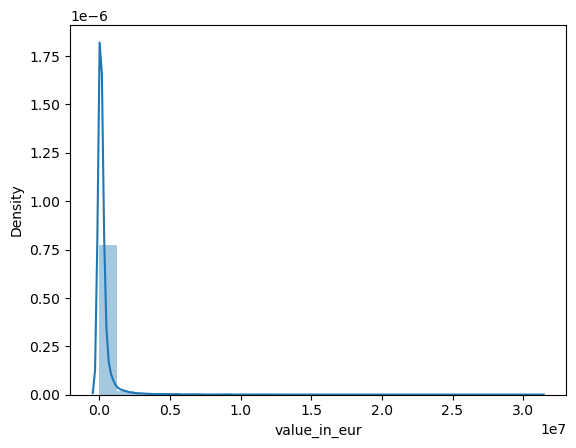

In [10]:
# Check for extreme values
sns.distplot(df['value_in_eur'],bins = 25, kde = True)

# we can not remove outliers, due to its importance for the analysis. We need to find out relation between price of the boat and its year built as well as the length length in the regression analysis. Therefore if we will remove outliers at this step we will not be able to see trend in there.

In [11]:
df['value_in_eur'].mean()

301799.1675369887

In [12]:
df['value_in_eur'].median()

95829.5

In [13]:
df['value_in_eur'].max()

31000000

# Preparation for regression analysis

# Hypothesis: 
1. Shorter boats have lower price 
2. as older the boat is as lower the price is

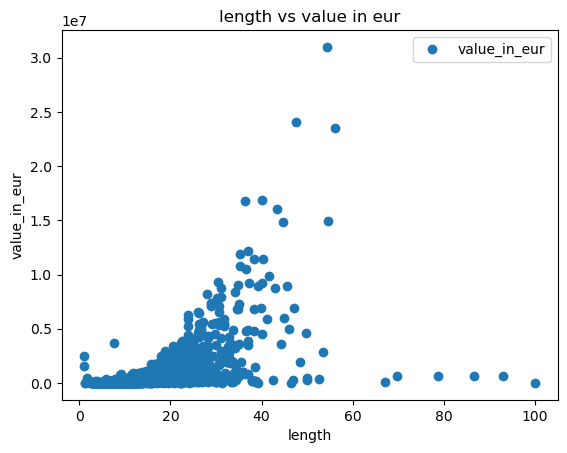

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.


df.plot(x = 'length', y='value_in_eur',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length vs value in eur')  
plt.xlabel('length')  
plt.ylabel('value_in_eur')  
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['length'].values.reshape(-1,1)
y = df['value_in_eur'].values.reshape(-1,1)

In [16]:
X

array([[4.  ],
       [4.  ],
       [3.  ],
       ...,
       [4.4 ],
       [4.37],
       [3.6 ]])

In [17]:
y

array([[3337],
       [3490],
       [3367],
       ...,
       [4499],
       [4300],
       [3780]], dtype=int64)

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis


In [19]:
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

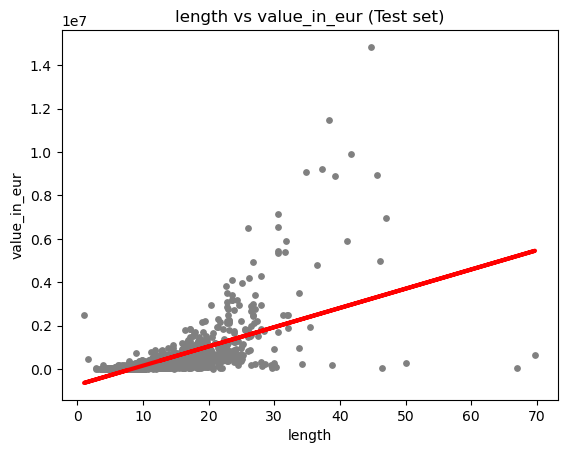

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('length vs value_in_eur (Test set)')
plot_test.xlabel('length')
plot_test.ylabel('value_in_eur')
plot_test.show()

#### we can see that the data has linear relationship and we see positive relationship in it. Which can prove that as higher the length is as higher the price is

In [23]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[88763.63303278]]
Mean squared error:  364893569909.5815
R2 score:  0.385446533386269


In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,35000,-7.156079e+04
1,14950,-2.535262e+05
2,885000,7.708061e+05
3,4900,-1.700884e+05
4,65000,8.821375e+04
5,949000,9.794006e+05
6,24500,1.272697e+05
7,39170,-2.038186e+05
8,69000,2.914825e+05
9,119600,4.383193e+04


# summary statistic doesnt show right prediction which can be caused by the outliers of the boats which are long and nevertheless has lower price. R2 is at 0.38 which shows us that less than 40% are explained by the regression model. This is a poor relationshiop

In [26]:
# Training set prediction

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[88763.63303278]]
Mean squared error:  695309155288.3967
R2 score:  0.2972690668721669


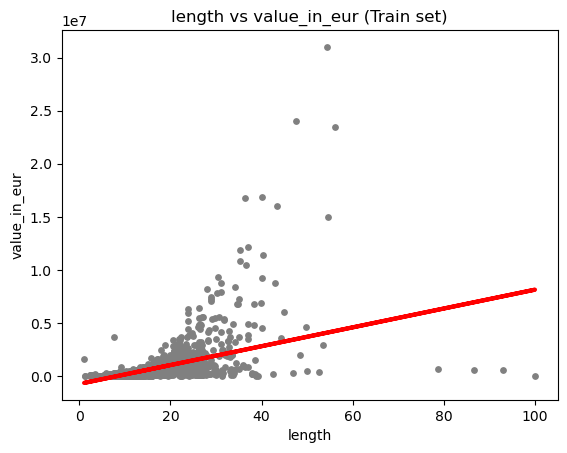

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('length vs value_in_eur (Train set)')
plot_test.xlabel('length')
plot_test.ylabel('value_in_eur')
plot_test.show()

# R2 score is less in the train set, we still see a positive trend, however the relationship in this set is weaker than in the test set. Still that can be due to influence of the outliers which are in the same price range of the short boats. We still can see on the scatterplot that as a rule it is usually so, that the price is higher if the boat is longer.

# Relationship between year_built and value

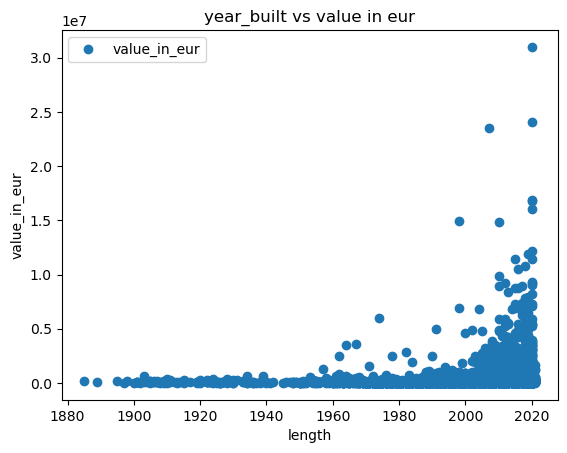

In [30]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.


df.plot(x = 'year_built', y='value_in_eur',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('year_built vs value in eur')  
plt.xlabel('length')  
plt.ylabel('value_in_eur')  
plt.show()

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['year_built'].values.reshape(-1,1)
y = df['value_in_eur'].values.reshape(-1,1)

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

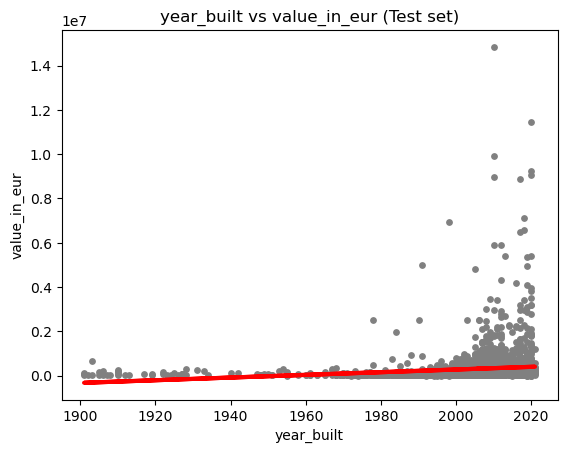

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('year_built vs value_in_eur (Test set)')
plot_test.xlabel('year_built')
plot_test.ylabel('value_in_eur')
plot_test.show()

# we see a very weak positive trend, which means, that the hypothesis isnt wrong, however the line is not explicitly shows strong relation. That could be due to different condition of the boats. In order to prove it analysis of different categories of the boat is needed.

In [37]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6052.55650522]]
Mean squared error:  584970007490.8778
R2 score:  0.014793968395606316


In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,35000,312177.936105
1,14950,294020.266589
2,885000,378756.057662
3,4900,245599.814547
4,65000,366650.944652
5,949000,360598.388146
6,24500,203231.919011
7,39170,396913.727178
8,69000,239547.258042
9,119600,396913.727178


In [40]:
# as it was mentioned before due to low R2 which is 0.014 we see that there is very weak relationship between this values.

In [41]:
# Training set prediction

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6052.55650522]]
Mean squared error:  979741527689.3547
R2 score:  0.009800643727093439


# in the training set relation is even weaker due to lower R2 and higher Mean squared error value.

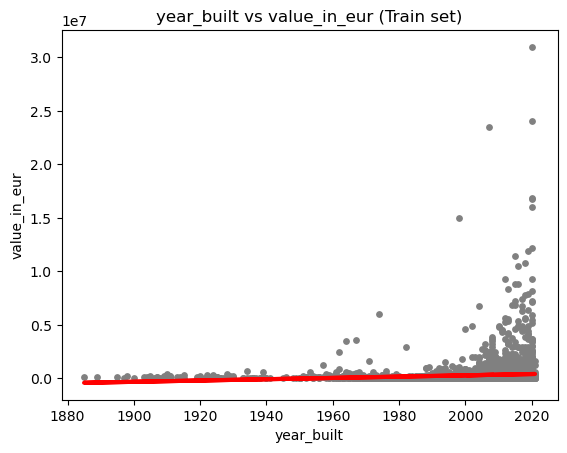

In [44]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('year_built vs value_in_eur (Train set)')
plot_test.xlabel('year_built')
plot_test.ylabel('value_in_eur')
plot_test.show()

# same here. The hypothesis isnt wrong, however the trend is showing weak relationship. As mentioned before that could be due to different boat conditions. Therefore Analysis between different boat categories must be done in order to find out.

# conlcusion: 
# both models are not suitable for making a predictions 